0 | 19.653167482633812 | 0.16545967751391558
1 | 2.94585497615587 | 0.0
2 | 5.718057257041989 | 0.0
3 | 32.385328536273065 | 0.17121147200694306
4 | 2.94585497615587 | 0.0
5 | 8.50917063096242 | 0.0
6 | 11.27425039921332 | 0.0
7 | 10.87409565499815 | 1.0
8 | 2.98578258722189 | 0.0
9 | 8.39320365238115 | 0.0
10 | 5.73137847629301 | 0.0
11 | 34.42804690500526 | 0.0
12 | 17.06591969144985 | 0.0
13 | 1.40673049935764 | 0.0
14 | 184.28169541585083 | 0.0
15 | 2.39705450780215 | 0.0
16 | 159.40983798072568 | 0.0
17 | 2.85799281775087 | 0.0
18 | 28.490879089221572 | 0.0
19 | 11.545435494639179 | 0.0
20 | 2.9741087782552 | 0.0
21 | 5.89232851670208 | 0.0
22 | 5.65642684141896 | 0.0
23 | 31.891888320474422 | 0.08554195217182818
24 | 11.6115104209083 | 1.0
25 | 5.8755624990608 | 1.0
26 | 11.6115104209083 | 1.0
27 | 11.505787292317141 | 0.692426895022829
28 | 8.72585812583171 | 1.0
29 | 55.15417884174089 | 0.0
30 | 5.65642684141896 | 0.0
31 | 10.758875500190939 | 0.0
32 | 2.84564225261916 | 0.0
33

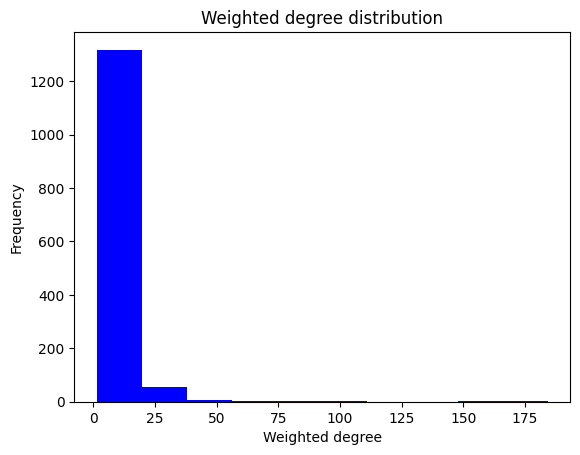

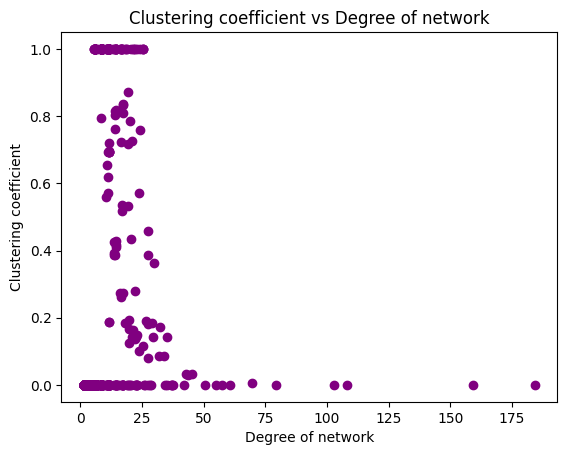

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "genes_network.csv"
df = pd.read_csv(csv_file)

numofnodes = set(df['node1']).union(set(df['node2']))  
n = len(numofnodes)  

adj = np.zeros((n, n))

for i in df.itertuples(index=False):   
    adj[i.node1, i.node2] = i.weight    
    adj[i.node2, i.node1] = i.weight

wdegrees = adj.sum(axis=1)

cluster_cof = np.zeros(n)

for i in range(n):
    neigh = np.nonzero(adj[i])[0]  
    k_neigh = len(neigh)
    
    if k_neigh < 2:
        cluster_cof[i] = 0
    else:
        total_weight = 0
        for l in range(k_neigh):
            for p in range(l + 1, k_neigh):
                j, m = neigh[l], neigh[p]  
                if adj[j, m] > 0: 
                    w_ij = adj[i, j]
                    w_im = adj[i, m]
                    w_jm = adj[j, m]
                    total_weight += ((w_ij + w_im) / 2) * w_jm
        
        cluster_cof[i] = total_weight / (k_neigh * (k_neigh - 1))

cluster_cof = np.clip(cluster_cof, 0, 1)
for i in range(n):
    print(f"{i} | {wdegrees[i]} | {cluster_cof[i]}")
plt.figure()
plt.hist(wdegrees, bins=10, color='blue')
plt.xlabel("Weighted degree")
plt.ylabel("Frequency")
plt.title("Weighted degree distribution")
plt.savefig('q3_part(a)_degree_distribution.png') 
plt.show()

plt.figure()
plt.scatter(wdegrees, cluster_cof, color='purple')
plt.xlabel("Degree of network")
plt.ylabel("Clustering coefficient")
plt.title("Clustering coefficient vs Degree of network")
plt.savefig('q3_part(b)_clustering_coefficient.png')  
plt.show()


* Degree for a weighted graph is defined as the sum of the weights of edges connected to the node.
* Clustering cofficient is the density of connections among the neighbour of a node in the unweighted graph but in the weighted graph it also take the weight of these coonections into account, which shows a little stronger link between neighbour. And in the code there is formula to calculate it.